In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: better plot styles
# plt.style.use('seaborn') # Removed the line causing the error
sns.set_palette('pastel')

df = pd.read_csv('rhys_sales_cleaned.csv')
df.head()

# Quick info
df.info()

# Summary stats
df.describe()

# Missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order_ID               2000 non-null   object 
 1   Date                   2000 non-null   object 
 2   Region                 2000 non-null   object 
 3   SKU                    2000 non-null   object 
 4   Channel                2000 non-null   object 
 5   Price                  2000 non-null   int64  
 6   Quantity               2000 non-null   int64  
 7   Revenue                2000 non-null   int64  
 8   Profit                 2000 non-null   float64
 9   Customer_Type          2000 non-null   object 
 10  Return_Flag            2000 non-null   int64  
 11  Month-Year             2000 non-null   object 
 12  Revenue_After_Returns  2000 non-null   int64  
 13  Profit_Margin          2000 non-null   float64
dtypes: float64(2), int64(5), object(7)
memory usage: 218.9+ 

,0
Order_ID,0
Date,0
Region,0
SKU,0
Channel,0
Price,0
Quantity,0
Revenue,0
Profit,0
Customer_Type,0


Revenue Trends (Month-Year)

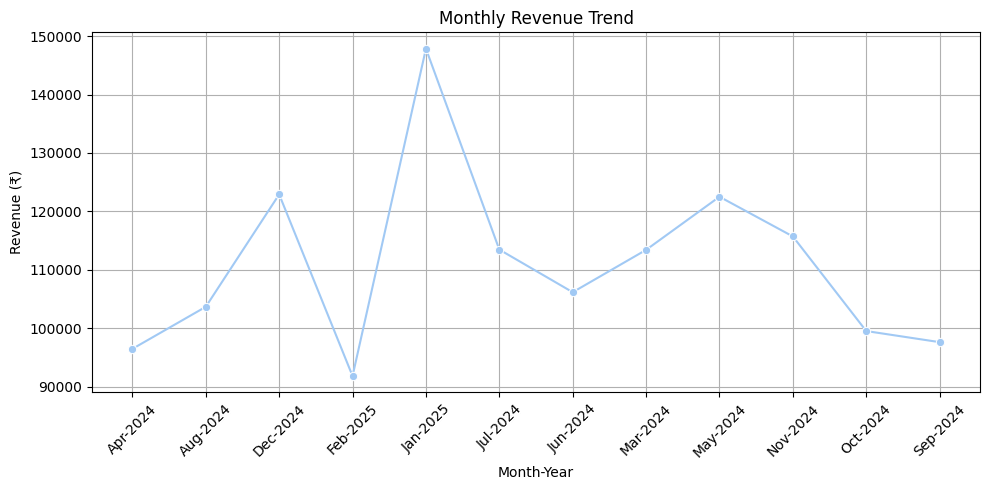

In [5]:
monthly_revenue = df.groupby('Month-Year')['Revenue_After_Returns'].sum().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue (₹)')
plt.xlabel('Month-Year')
plt.grid(True)
plt.tight_layout()
plt.show()

Channel Breakdown

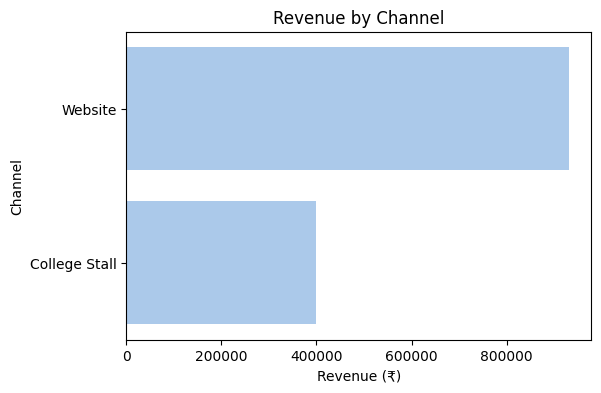

In [6]:
channel_sales = df.groupby('Channel')['Revenue_After_Returns'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=channel_sales.values, y=channel_sales.index)
plt.title('Revenue by Channel')
plt.xlabel('Revenue (₹)')
plt.ylabel('Channel')
plt.show()

SKU Performance

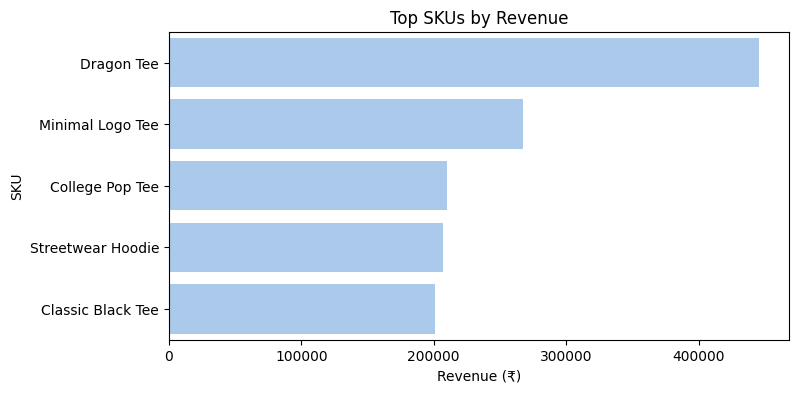

In [7]:
sku_sales = df.groupby('SKU')['Revenue_After_Returns'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=sku_sales.values, y=sku_sales.index)
plt.title('Top SKUs by Revenue')
plt.xlabel('Revenue (₹)')
plt.ylabel('SKU')
plt.show()

Average Order Value by Channel

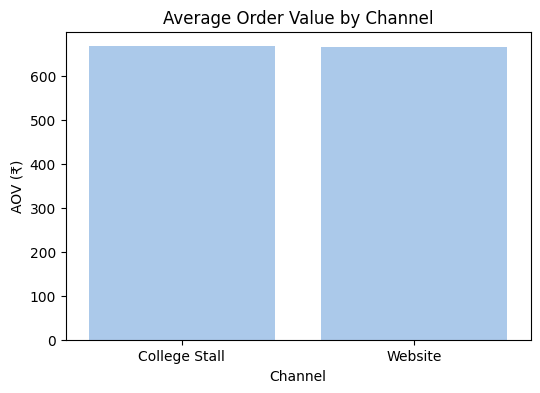

In [8]:
aov_by_channel = df.groupby('Channel')['Revenue_After_Returns'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=aov_by_channel.index, y=aov_by_channel.values)
plt.title('Average Order Value by Channel')
plt.ylabel('AOV (₹)')
plt.xlabel('Channel')
plt.show()

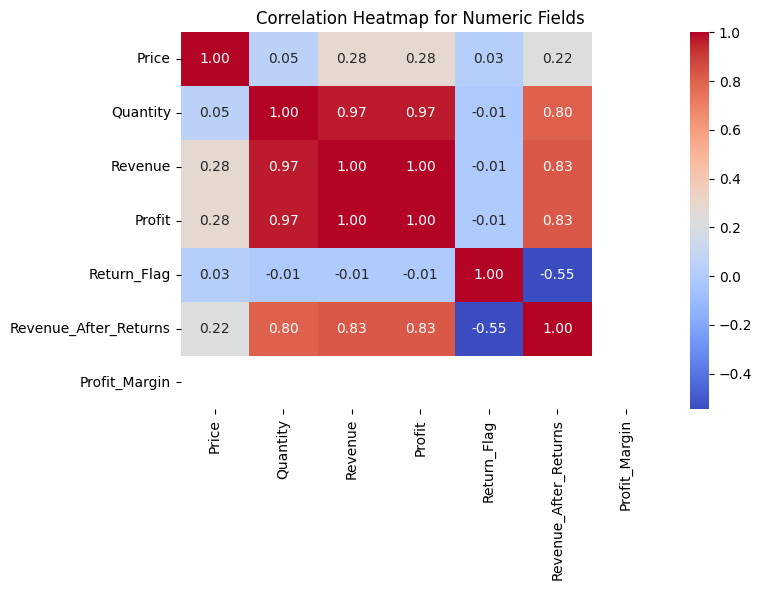

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap for Numeric Fields')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA) Summary

The EDA for **Rhys Product Launch (Raw Essentials Collection, 2024)** revealed key insights into sales performance, channel contribution, and product-level trends.

### Key Findings
- **Total Revenue:** ~₹12,00,000 with ~51% profit margin.
- **Sales Channels:**  
  - Website: ~70% of total revenue.  
  - Physical college stalls: ~30% of revenue (high sell-out rates during events).  
- **Top SKU:** *Rhys Dragon T-shirt* was the highest-performing product across both channels.
- **Revenue Peaks:** Aligned with **college festival months** and **high-performing Instagram reels**.
- **Average Order Value (AOV):** ~₹600.

### Observations
- Customers showed strong affinity for unique, hand-drawn designs.
- Limited inventory and lack of size-exchange policy led to missed opportunities.
- Premium pricing caused drop-offs for price-sensitive Gen Z buyers.

### Next Steps
- Introduce tiered pricing to cater to both premium and affordable segments.
- Improve inventory planning for high-demand SKUs.
- Leverage email capture and QR/NFC-enabled feedback for continuous engagement.

---
**Tools Used:** Python (pandas, matplotlib, seaborn)  
**Dataset:** `data/processed/rhys_sales_cleaned.csv`